# Lecture 6: Output tracking relative degree approach
## Contents
* Conventional SMC Approach
* Integeral SMC
* Super-twisting SMC

## Conventional approach
System target: design control $u$ to drive 
$$
lim(y_c(t)-y(t))=0.
$$
Consider a system:
$$
\tag{1.59} 
\begin{align}
\dot{x_1} &= x_2 \\
\dot{x_2} &= u+f(x_1,x_2,t)\\ 
\end{align}
$$

Tracking error is defined as $ e = y_c-y $. Define sliding variable as
$$
\sigma=\dot{e}+ce \tag{1.61}
$$
$\sigma$-dynamics
$$
\tag{1.63}
\begin{align}
\dot{\sigma} &=\underbrace{\ddot{y_c}+c\dot{y_c}-f(y,\dot{y},t)-c\dot{y}}_{\phi(y,\dot{y},t)}-u \\
             & = \phi(y,\dot{y},t)-u
\end{align}
$$
Assumptions:
* $y_c, \dot{y_c},\ddot{y_c}$ are know at current time
* Disturbance $\phi(y,\dot{y},t)$ is bounded, $\vert{\phi(y,\dot{y},t)} \leq M $.

Conventional SMC $u$ can be designed using existence condition, let $V=\frac{1}{2}\sigma ^2$, $\dot{V}=\sigma\dot{\sigma}$ should be positive definate(PD), and for finite time convergence of $\sigma$ to zero.
$$
\begin{align}
\dot{V}\leq -\alpha V^{\frac{1}{2}} \\
\dot{V}\leq -\frac{\alpha}{\sqrt{2}}\vert{\sigma} 
\end{align}
$$
Therefore,
$$
\tag{1.65}
\begin{align}
\sigma\dot{\sigma} &= \sigma (\phi(y,\dot{y},t)-u) \\
                   & \leq \vert{\sigma}M-\sigma u
\end{align}
$$
select control as
$$
\tag{1.66}
u = \rho sign(\sigma)
$$
Substitude Eq.(1.66) into Eq(1.65),
$$
\begin{align}
\sigma\dot{\sigma} &\leq \vert{\sigma}(M-\rho) \\
\sigma\dot{\sigma} &\leq -\frac{\alpha}{\sqrt{2}}\vert{\sigma} \\
&\Downarrow \\
\rho &= M + \frac{\alpha}{\sqrt{2}}
\end{align}
$$
### Example:
system Eq(1.59)
$$
\begin{align}
x_{10} &= 1;\\
x_{20} &= -2; \\
\rho &= 6;\\
c &= 1.5;\\
y_c &=2*cos(t);\\
f(x_1,x_2,t)&=sin(2t);
\end{align}
$$

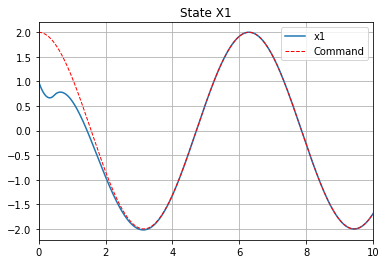

In [10]:
# Tracking problem with conventional SMC
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np


sqrt = np.sqrt
sin = np.sin
cos = np.cos
sign = np.sign

def model(t, x, u):
    return [x[1], u + sin(2*t)]

Te = 10
ts = 1e-3
x0 = [1,-2]

sim_time = np.linspace(0, Te, (Te/ts))
m = 0
err = []
err_dot = []
sigma =[]
u =[]
state=[]

for t in sim_time:
    # Controller
    yc = 2 * cos(t)
    err.append(yc-x0[0])
    err_dot.append(-2*sin(t)-x0[1])
    sigma.append(err_dot[m]+1.5*err[m])
    u.append(6*sign(sigma[m]));
    state.append(x0)
    sol = integrate.solve_ivp(lambda t,x: model(t,x,u[m]), [0, ts], x0, t_eval = [0,ts])
    x0 = sol.y[:,1]
    m = m+1
# plt.plot(phi, u)
state = np.array(state)

plt.figure()

plt.plot(sim_time, state[:,0],label='x1')
plt.plot(sim_time, 2 * cos(sim_time), color='red', linewidth=1.0, linestyle='--',label='Command')
plt.xlim((0, Te))
plt.legend(loc='upper right')
plt.grid(True)
plt.title('State X1')
plt.show()

### Plot  other Results

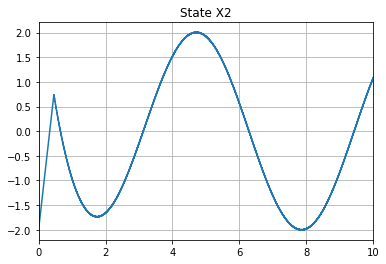

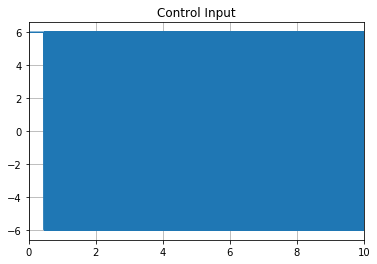

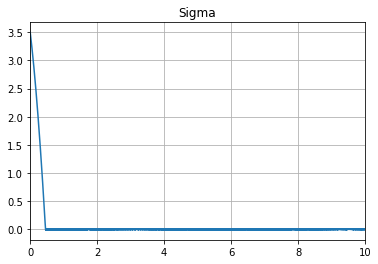

In [12]:
#x2
plt.figure()
plt.plot(sim_time, state[:,1],label='x2')
plt.title('State X2')
plt.xlim((0, Te))
plt.grid(True)
plt.show()
# Control Input u
u=np.array(u);
plt.figure()
plt.plot(sim_time, u)
plt.title('Control Input')
plt.xlim((0, Te))
plt.grid(True)
plt.show()
# Sliding variable sigma
sigma = np.array(sigma);
plt.figure()
plt.plot(sim_time, sigma)
plt.title('Sigma')
plt.grid(True)
plt.xlim((0, Te))
plt.show()

## Integral SMC

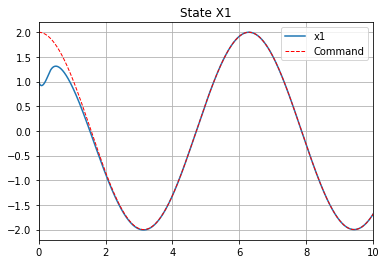

In [1]:
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np


sqrt = np.sqrt
sin = np.sin
cos = np.cos
sign = np.sign

def model(t, x, u, u2):
    return [x[1], u + sin(2*t),-u2]

Te = 10
ts = 1e-3
# control gains
c=1.5;
k=6;
rho1=8

# Initial condition
x10=1;
x20=-2;

# z0=yc_dot(0)+c*yc(0)-x2(0)-cy(0)
z0=-2*sin(0)+c*2*cos(0)-x20-c*x10;

x0=[x10,x20,z0];

sim_time = np.linspace(0, Te, (Te/ts))
m = 0
err = []
err_dot = []
sigma =[]
u =[]
state=[]
s = []
u1 = []
u2 = []

for t in sim_time:
    # Controller
    state.append(x0)
    yc = 2 * cos(t)
    err.append(yc-x0[0])
    err_dot.append(-2*sin(t)-x0[1])
    sigma.append(err_dot[m]+1.5*err[m])
    s.append(sigma[m]-x0[2])
    u1.append(rho1*sign(s[m]))
    u.append(k*sigma[m]+u1[m])
    u2.append(u[m]-u1[m])
    sol = integrate.solve_ivp(lambda t,x: model(t,x,u[m],u2[m]), [0, ts], x0, t_eval = [0,ts])
    x0 = sol.y[:,1]
    m = m+1
# plt.plot(phi, u)
state = np.array(state)

plt.figure()

plt.plot(sim_time, state[:,0],label='x1')
plt.plot(sim_time, 2 * cos(sim_time), color='red', linewidth=1.0, linestyle='--',label='Command')
plt.xlim((0, Te))
plt.legend(loc='upper right')
plt.grid(True)
plt.title('State X1')
plt.show()

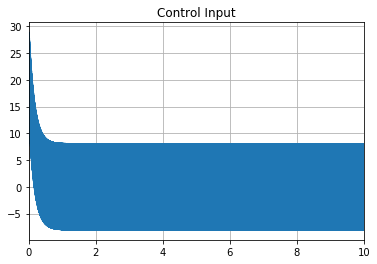

In [82]:
u=np.array(u);
plt.figure()
plt.plot(sim_time, u)
plt.title('Control Input')
plt.xlim((0, Te))
plt.grid(True)
plt.show()

## Super-Twist SMC

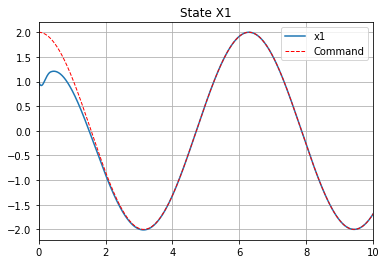

In [8]:
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np

sqrt = np.sqrt
sin = np.sin
cos = np.cos
sign = np.sign

def model(t, x, u, w_dot):
    return [x[1], u + sin(2*t),w_dot]

Te = 10
ts = 1e-3
# control gains
c = 13.5
b = 88
rho1 = 8


# Initial condition
x10= 0
x20=-2
w0 = 0

x0=[x10,x20,w0];

sim_time = np.linspace(0, Te, (Te/ts))
m = 0
err = []
err_dot = []
sigma =[]
u =[]
state=[]

for t in sim_time:
    # Controller
    state.append(x0)
    yc = 2 * cos(t)
    err.append(yc-x0[0])
    err_dot.append(-2*sin(t)-x0[1])
    sigma.append(err_dot[m]+1.5*err[m])
    u.append(c*sqrt(abs(sigma[m]))*sign(sigma[m])+x0[2])
    w_dot = b * sign(sigma[m])
    sol = integrate.solve_ivp(lambda t,x: model(t,x,u[m],w_dot), [0, ts], x0, t_eval = [0,ts])
    x0 = sol.y[:,1]
    m = m+1
# plt.plot(phi, u)
state = np.array(state)

plt.figure()

plt.plot(sim_time, state[:,0],label='x1')
plt.plot(sim_time, 2 * cos(sim_time), color='red', linewidth=1.0, linestyle='--',label='Command')
plt.xlim((0, Te))
plt.legend(loc='upper right')
plt.grid(True)
plt.title('State X1')
plt.show()

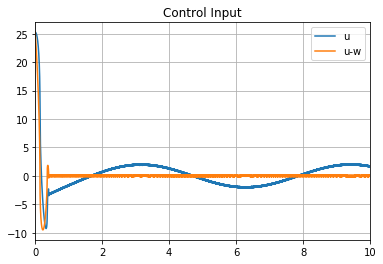

In [9]:
u=np.array(u)
u1 = u-state[:,2]
plt.figure()
plt.plot(sim_time, u,label='u')
plt.plot(sim_time, u1,label='u-w')
plt.title('Control Input')
plt.xlim((0, Te))
plt.grid(True)
plt.legend(loc='upper right')
plt.show()